# Demo of CNMF

This notebook demonstrates how to use CMFpy, a package that implements Convolutive Matrix (CMF) in Python. The goal of CMF is to minimize the objective

$$ J = \| \hat{X} - X \| $$

where $X$ is a data matrix and $\hat{X}$ is an estimate given by

$$ \hat{X} = W * \mathcal{H} = \sum_{l=1}^{L} W_{::l} H_l $$

where $W$ is an $N \times K \times L$ tensor and $H_l$ is the matrix $\mathcal{H}$ with columns shifted right $l$ times and padded with zeros on the left.

In [1]:
import matplotlib.pyplot as plt

from numpy.linalg import norm

from cmfpy import CMF  # CMF model
# from cmfpy.utils import sort_neurons, plot_H_components  # Helper functions for visual
from cmfpy.datasets import Synthetic  # Synthetic dataset

/usr/local/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


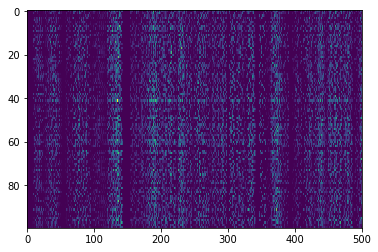

In [14]:
# Generate data

synth_dataset = Synthetic(n_components=3,
                          n_features=100,
                          n_lags=10,
                          n_timebins=500,
                          W_sparsity=.7,
                          H_sparsity=.9,
                          noise_scale=0.0,
                          seed=0)

data = synth_dataset.generate()
plt.imshow(data, aspect='auto')
plt.show()

In [15]:
# Fit model
model = CMF(n_components=3,
            maxlag=10,
            alg_name='mult',
            n_iter_max=300,
            tol=1e-6)
model.fit(data);

 96%|█████████▌| 288/300 [00:02<00:00, 109.97it/s]


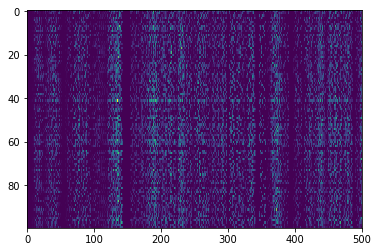

In [18]:
plt.imshow(model.predict(), aspect='auto')